# Group 28: Effectiveness of Covid-19 Vaccination

Name: Rajan Shantanu Chaturvedi
NetID: rsc9044

In [1]:
#Installing and Importing libraries:
!pip install geopandas
!pip install mapclassify
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import geopandas 
import mapclassify as mc
import seaborn as sns
import statsmodels.api as sm
import scipy
from scipy import stats
import warnings
warnings.simplefilter("ignore")

In [2]:
#Importing Datasets:

#Covid Cases Dataset
us_cases = pd.read_csv("/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")


#Covid Cases Dataset
us_vac = pd.read_csv("/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/us_state_vaccinations.csv")



In [3]:
us_cases

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,3/11/21,Kansas,"297,229","241,035","56,194",0,0,"4,851",NaN,NaN,0,0,3/12/21 15:20,Agree,NaN
1,2/12/21,Utah,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,2/13/21 14:50,Agree,Agree
2,2/4/20,Arkansas,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/20 16:22,Not agree,Not agree
3,12/6/21,Mississippi,"1,104","1,104",0,0,0,5,5,0,2,0,12/8/21 0:00,Agree,Agree
4,1/1/22,Utah,"636,992","636,992",0,0,0,"3,787","3,635",152,0,0,1/3/22 13:55,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47191,6/7/20,South Dakota,"5,438",NaN,NaN,71,0,65,64,1,0,1,6/8/20 14:55,NaN,Agree
47192,4/30/21,South Dakota,"122,660",NaN,NaN,128,17,"1,967","1,601",366,5,1,5/1/21 13:43,NaN,Agree
47193,4/6/20,New Mexico,686,NaN,NaN,62,0,12,NaN,NaN,0,0,4/8/20 0:00,NaN,Not agree
47194,3/13/21,Iowa,"342,495",NaN,NaN,425,77,"5,633",NaN,NaN,3,3,3/14/21 13:53,Not agree,Not agree


In [4]:
us_vac

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,1/12/21,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,1/13/21,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,1/14/21,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,1/15/21,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,1/16/21,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26394,4/23/22,Wyoming,752416.0,972085.0,339823.0,51.48,130.01,297974.0,58.72,167.96,NaN,569.0,983.0,0.774,128189.0,22.15
26395,4/24/22,Wyoming,752491.0,972085.0,339861.0,51.49,130.02,298011.0,58.72,167.96,75.0,516.0,892.0,0.774,128215.0,22.15
26396,4/25/22,Wyoming,752493.0,972085.0,339872.0,51.49,130.02,298018.0,58.72,167.96,2.0,514.0,888.0,0.774,128217.0,22.15
26397,4/26/22,Wyoming,753507.0,972285.0,339999.0,51.51,130.19,298130.0,58.75,167.99,1014.0,519.0,897.0,0.775,128391.0,22.18


In [5]:
# Data Wrangling Steps:
# Removing Unnecessary Columns

cases_cols= ['prob_cases','conf_cases','pnew_case','conf_death', 'prob_death','pnew_death', 'created_at', 'consent_cases','consent_deaths']
for i in cases_cols:
    us_cases.drop('{}'.format(i), axis=1, inplace=True)


vac_cols= ['total_distributed', 'people_vaccinated', 'distributed_per_hundred', 'daily_vaccinations_raw', 'share_doses_used', 'total_boosters', 'total_boosters_per_hundred']
for i in vac_cols:
    us_vac.drop('{}'.format(i), axis=1, inplace=True)

In [6]:
# Dropping Null Values
us_cases=us_cases.dropna()
us_vac=us_vac.dropna()

In [7]:
# Changing Data types of relevant columns
us_cases['new_case'] = us_cases['new_case'].str.replace(',', '').astype(int)
us_cases['submission_date'] = pd.to_datetime(us_cases['submission_date'])
us_vac['date'] = pd.to_datetime(us_vac['date'])


In [8]:
us_cases.dtypes

submission_date    datetime64[ns]
state                      object
tot_cases                  object
new_case                    int64
tot_death                  object
new_death                  object
dtype: object

In [9]:
us_vac.dtypes

date                                   datetime64[ns]
location                                       object
total_vaccinations                            float64
people_fully_vaccinated_per_hundred           float64
total_vaccinations_per_hundred                float64
people_fully_vaccinated                       float64
people_vaccinated_per_hundred                 float64
daily_vaccinations                            float64
daily_vaccinations_per_million                float64
dtype: object

In [10]:
#Sorting Datasets according to the datewise

us_cases=us_cases.sort_values(by='submission_date')
us_vac=us_vac.sort_values(by='date')

In [11]:
# Merging Datasets on common dates

dfc=us_cases.groupby('submission_date').sum()
dfc.reset_index(inplace=True)
mask = (dfc['submission_date'] >= '2021-01-15') & (dfc['submission_date'] <= '2022-04-15')
dfc=dfc.loc[mask]
dfc = dfc.rename(columns={"submission_date":"date"})
dfc

,date,new_case
359,2021-01-15,240083
360,2021-01-16,213340
361,2021-01-17,184326
362,2021-01-18,151646
363,2021-01-19,149952
...,...,...
810,2022-04-11,34958
811,2022-04-12,28446
812,2022-04-13,47068
813,2022-04-14,64204


In [12]:
dfv = us_vac[['date','location','people_fully_vaccinated']]
dfv = dfv[(dfv['location'] == 'United States')]
dfv=dfv.sort_values(by='date')
m = (dfv['date'] >= '2021-01-15') & (dfv['date'] <= '2022-04-15')
dfv=dfv.loc[m]
dfv

,date,location,people_fully_vaccinated
22163,2021-01-15,United States,1610524.0
22167,2021-01-19,United States,2023124.0
22168,2021-01-20,United States,2161419.0
22169,2021-01-21,United States,2394961.0
22170,2021-01-22,United States,2756953.0
...,...,...,...
22613,2022-04-10,United States,218377792.0
22614,2022-04-11,United States,218430663.0
22615,2022-04-12,United States,218521227.0
22616,2022-04-13,United States,218622907.0


In [13]:
#Merged Dataset
fdf = pd.merge(dfc, dfv, on='date')
fdf=fdf.dropna()
fdf

,date,new_case,location,people_fully_vaccinated
0,2021-01-15,240083,United States,1610524.0
1,2021-01-19,149952,United States,2023124.0
2,2021-01-20,188332,United States,2161419.0
3,2021-01-21,188577,United States,2394961.0
4,2021-01-22,191102,United States,2756953.0
...,...,...,...,...
399,2022-04-10,18621,United States,218377792.0
400,2022-04-11,34958,United States,218430663.0
401,2022-04-12,28446,United States,218521227.0
402,2022-04-13,47068,United States,218622907.0


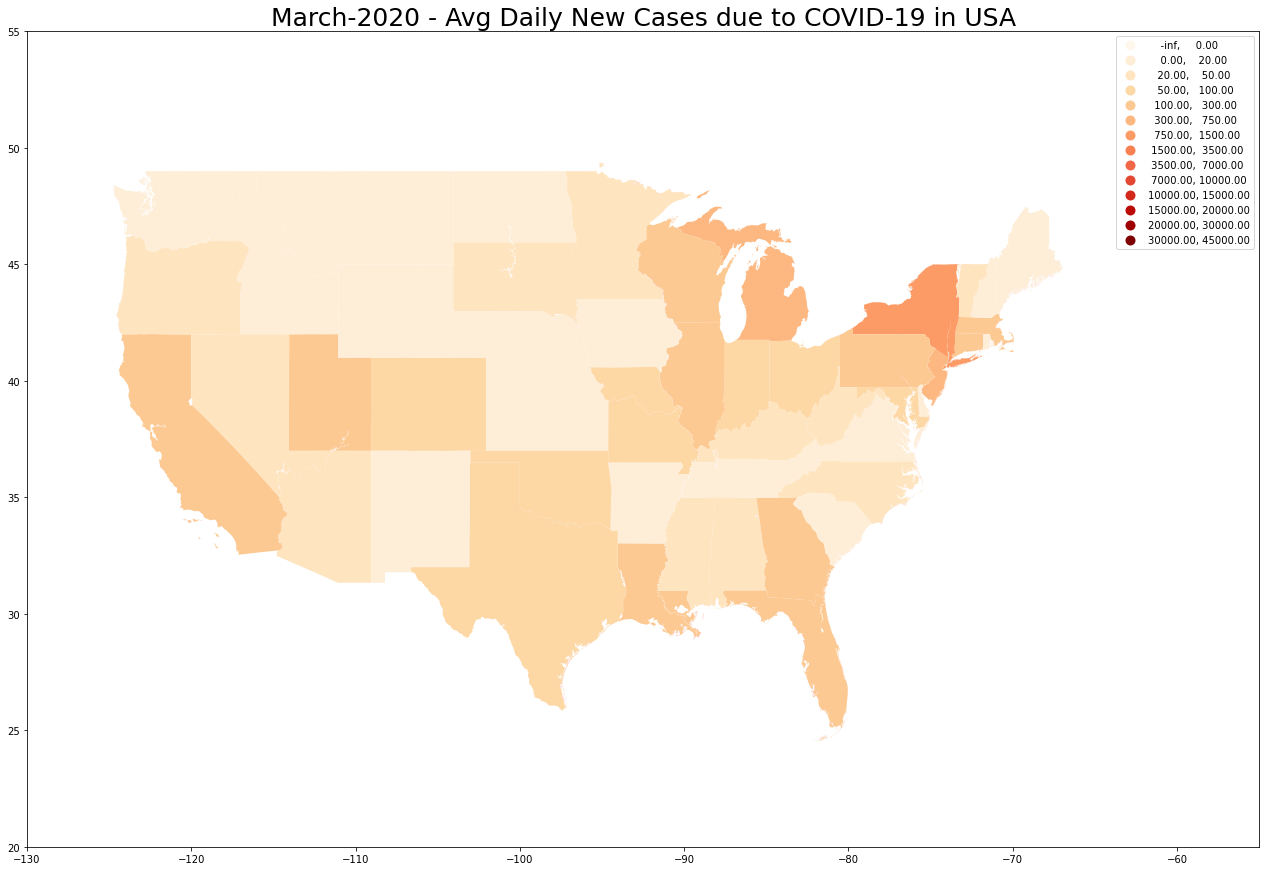

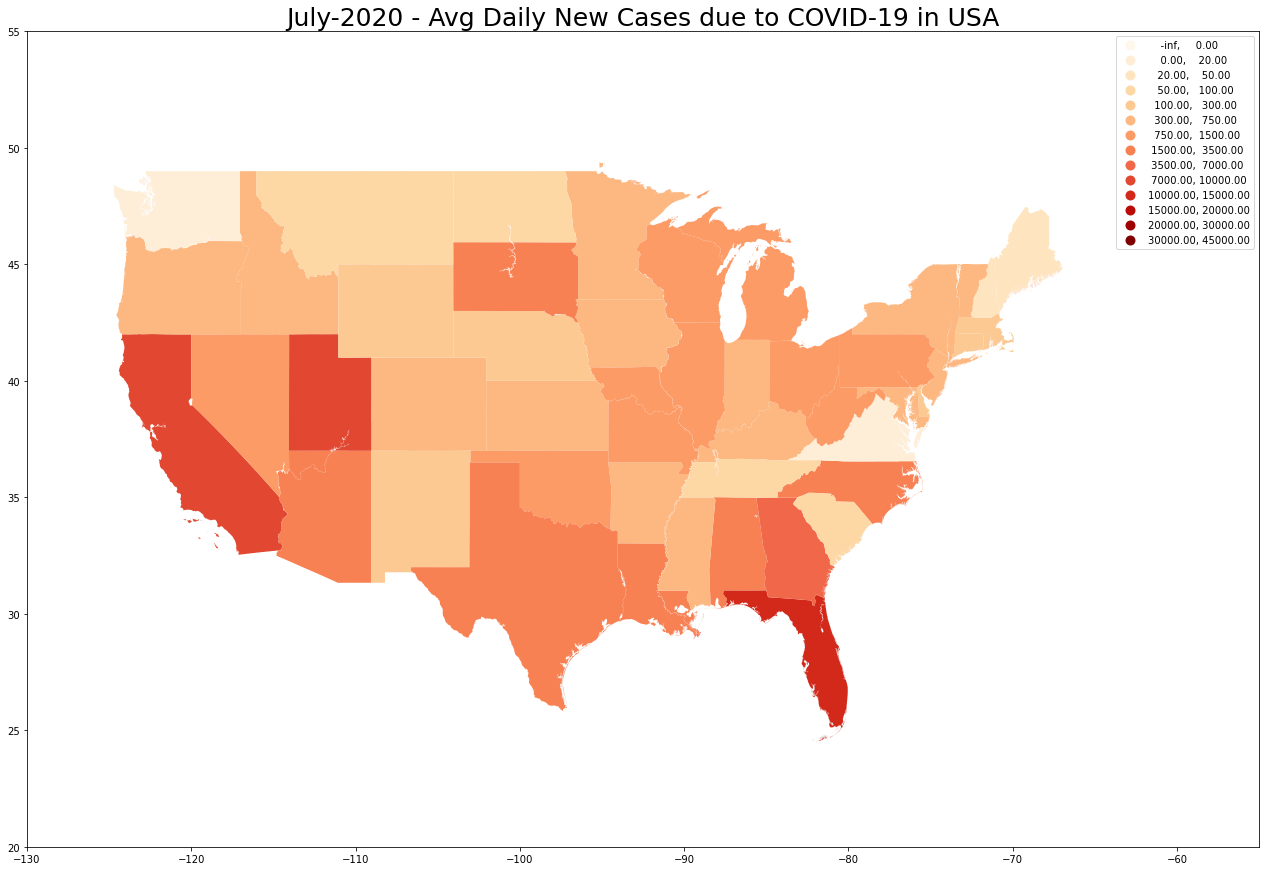

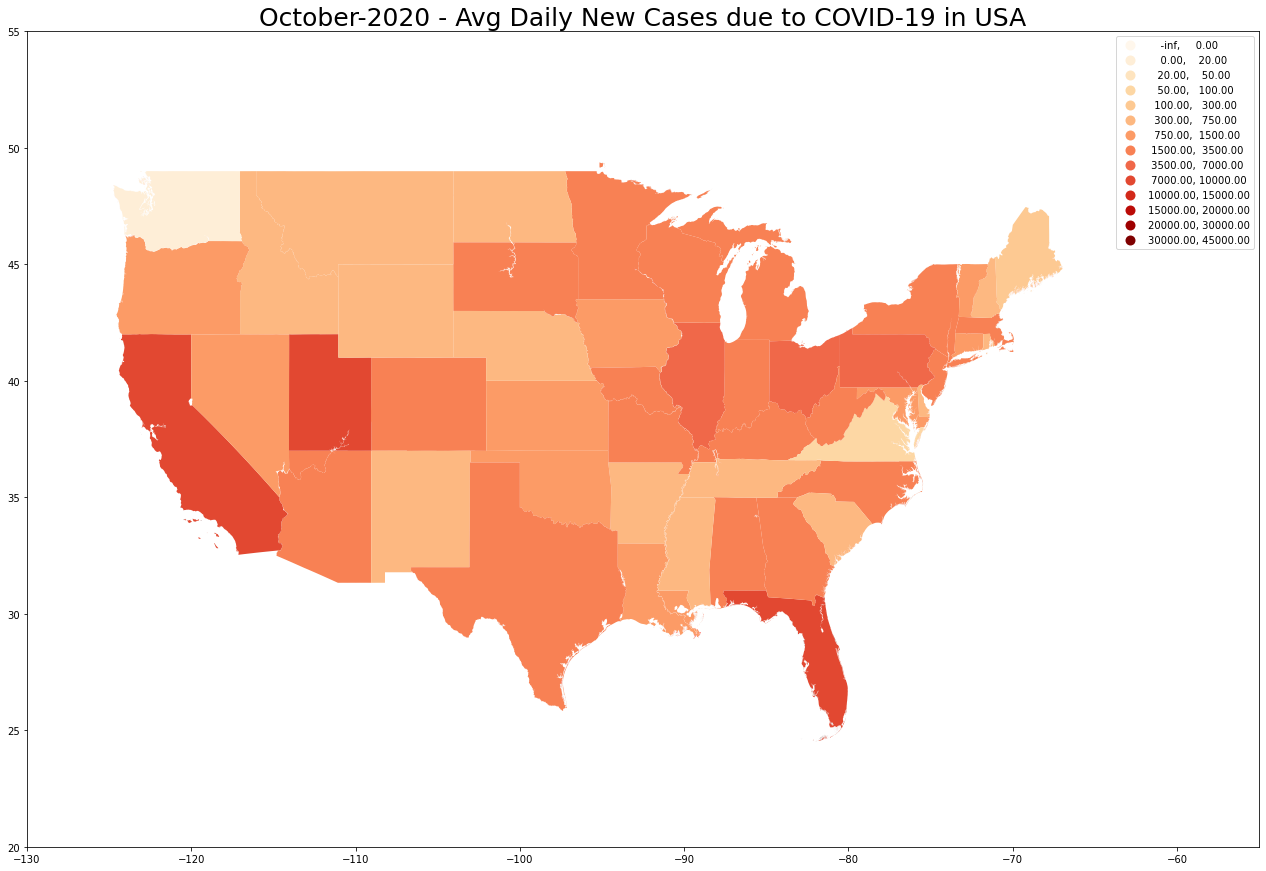

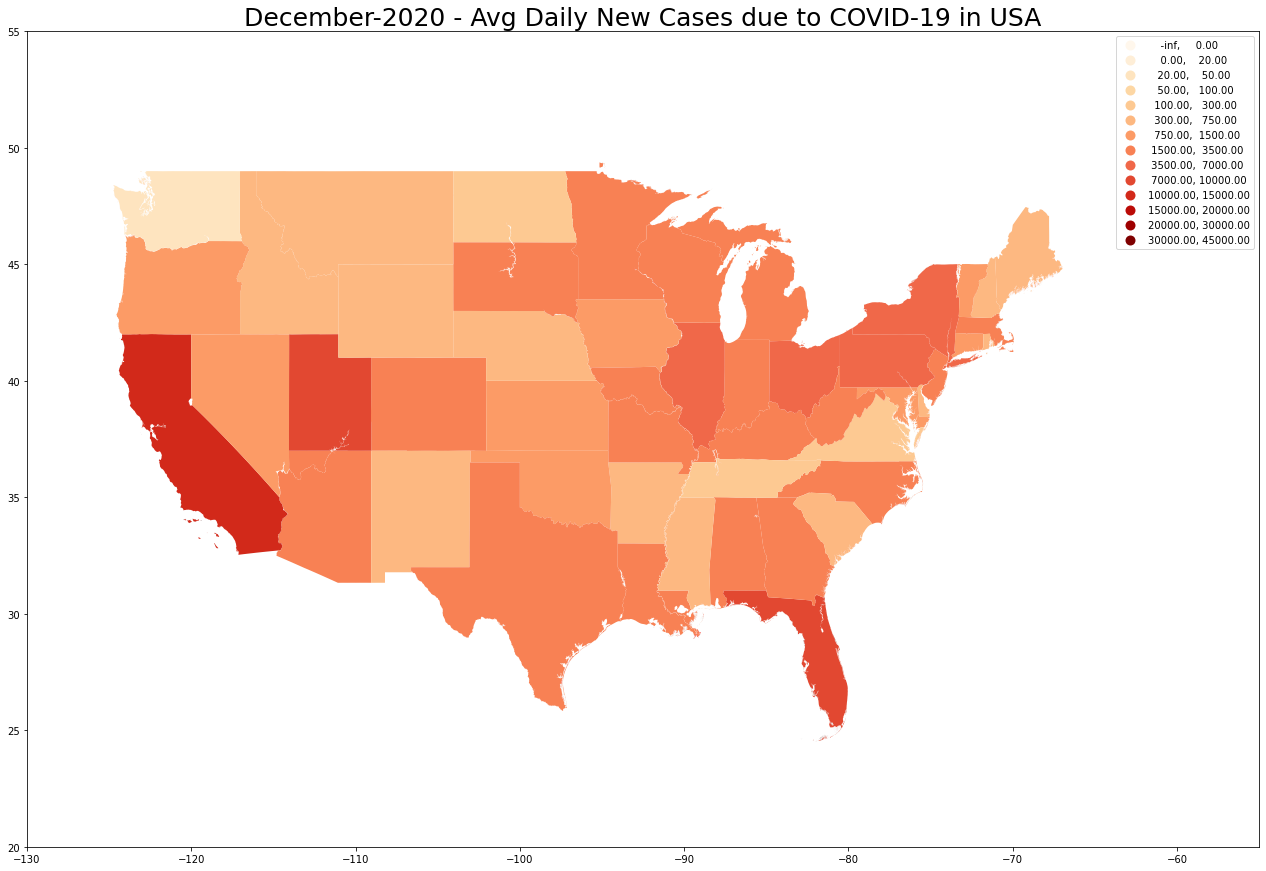

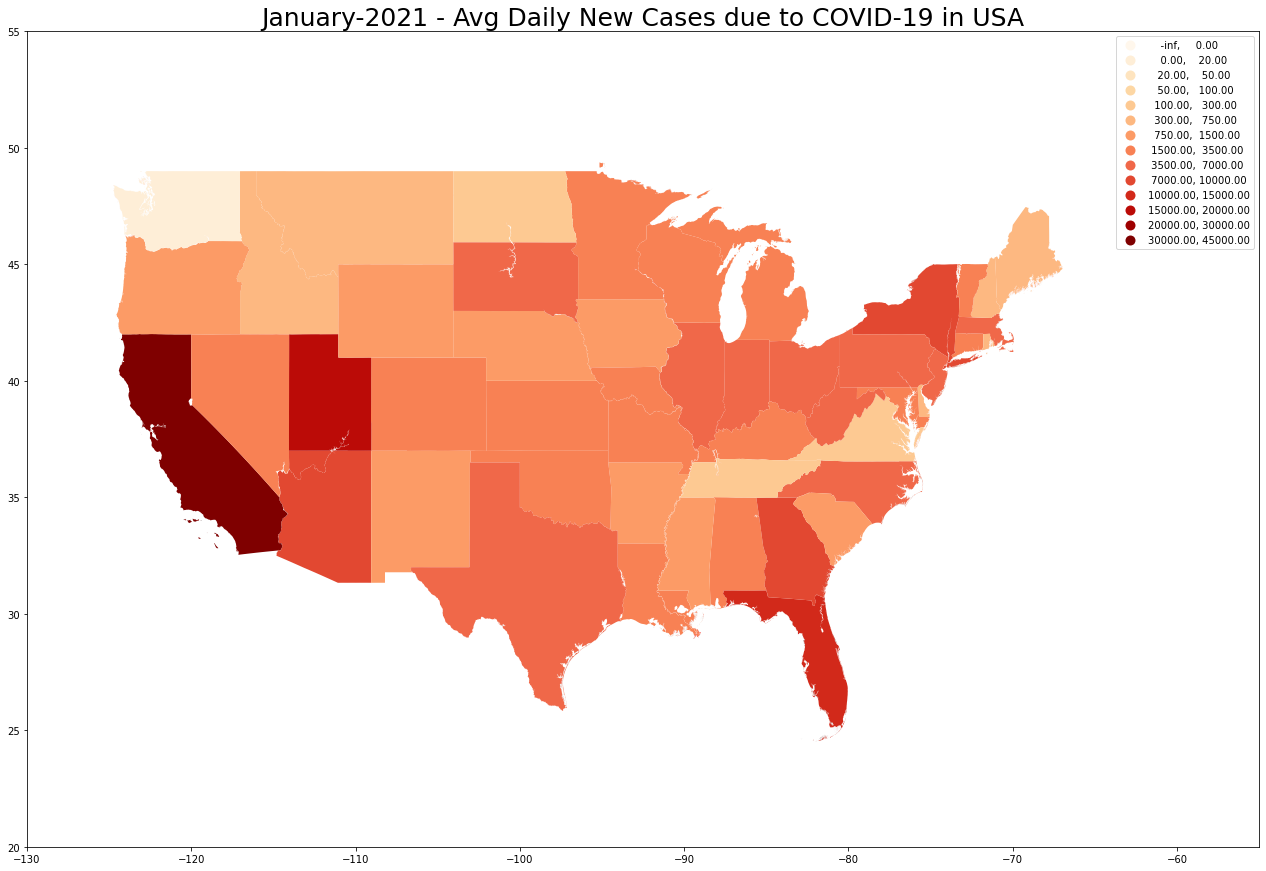

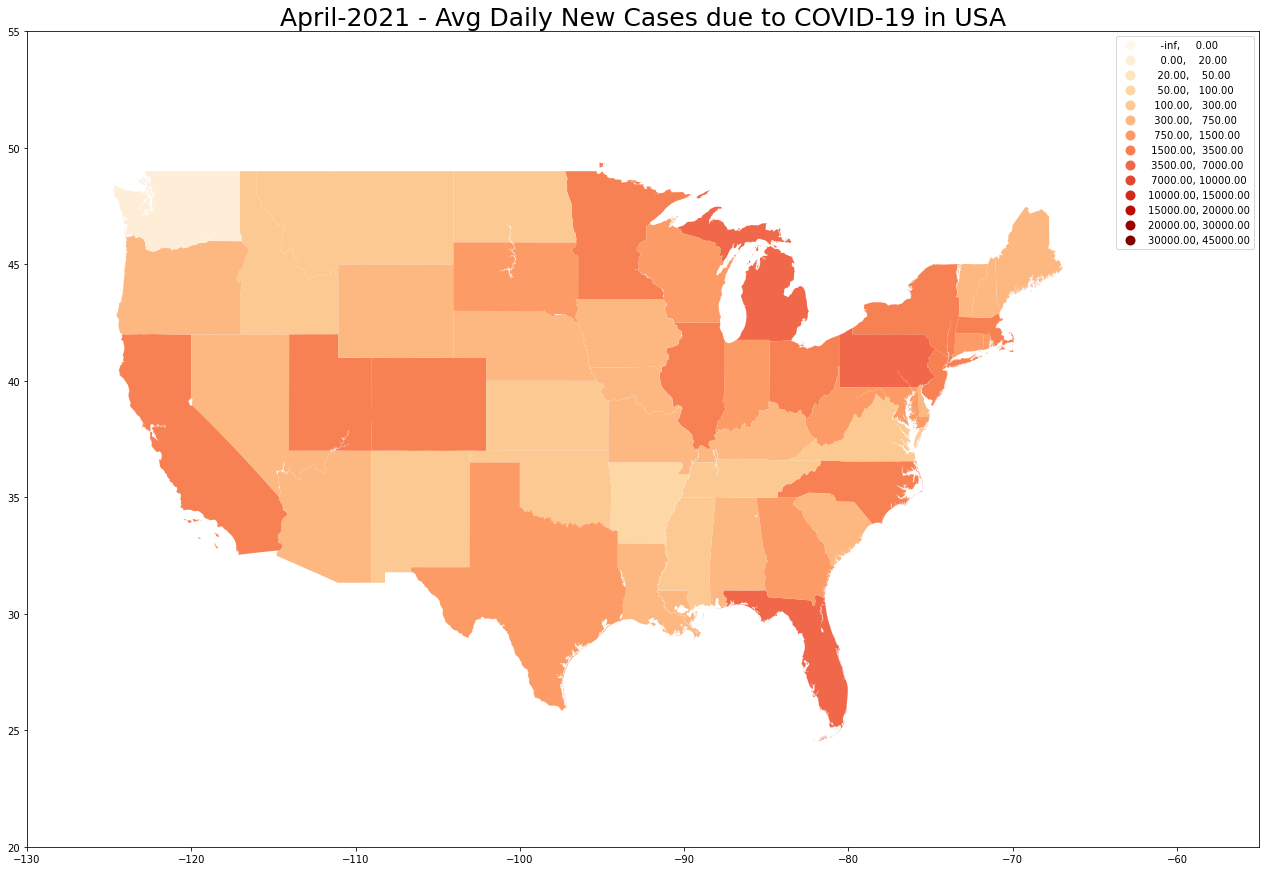

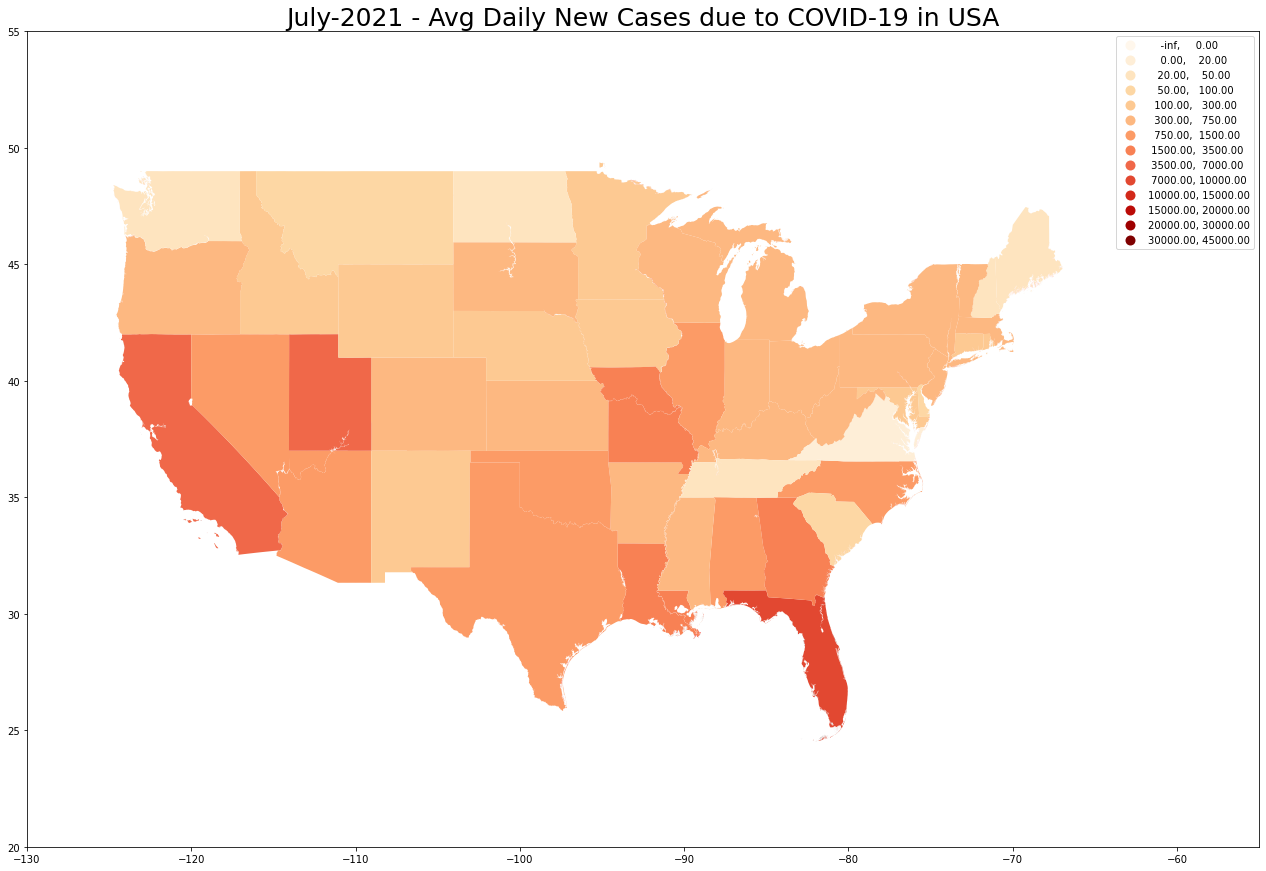

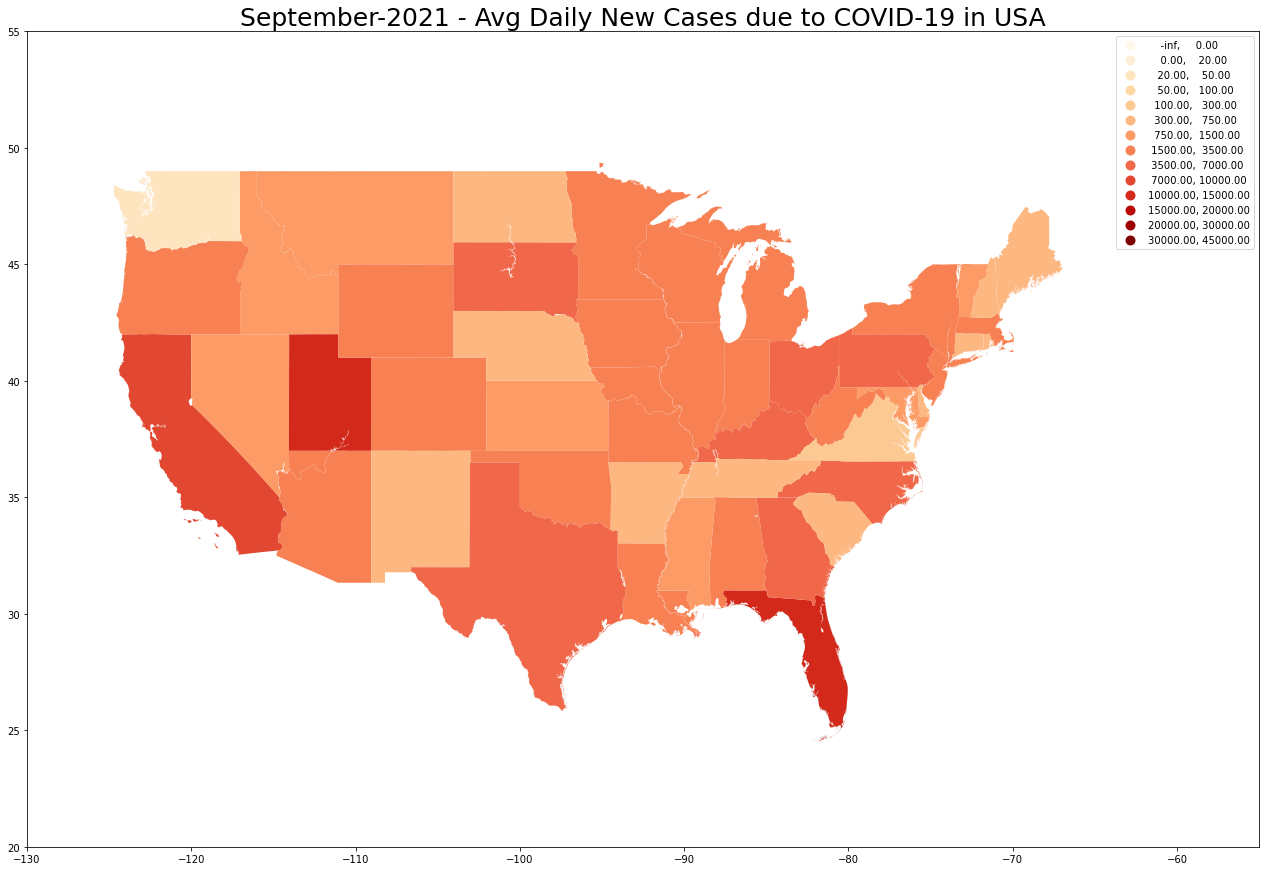

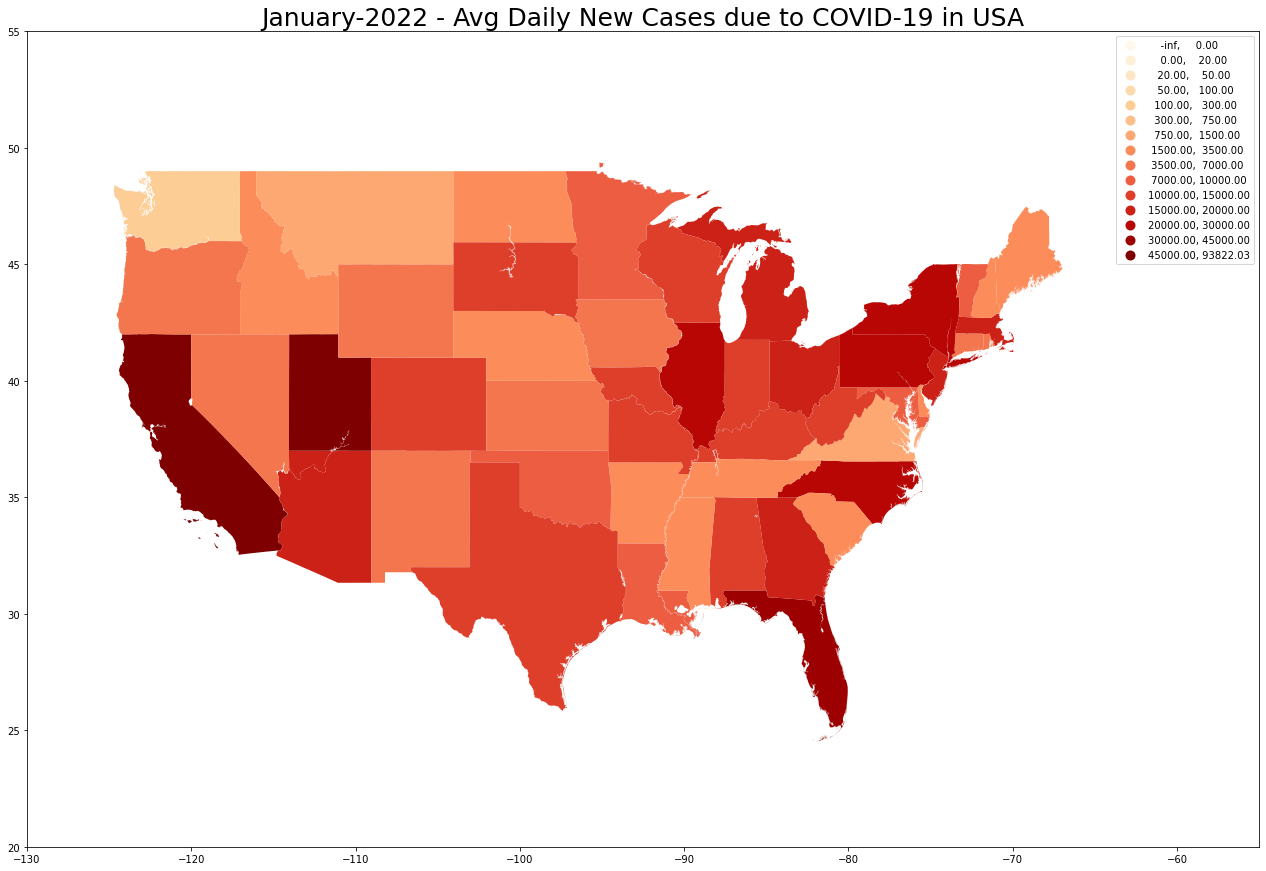

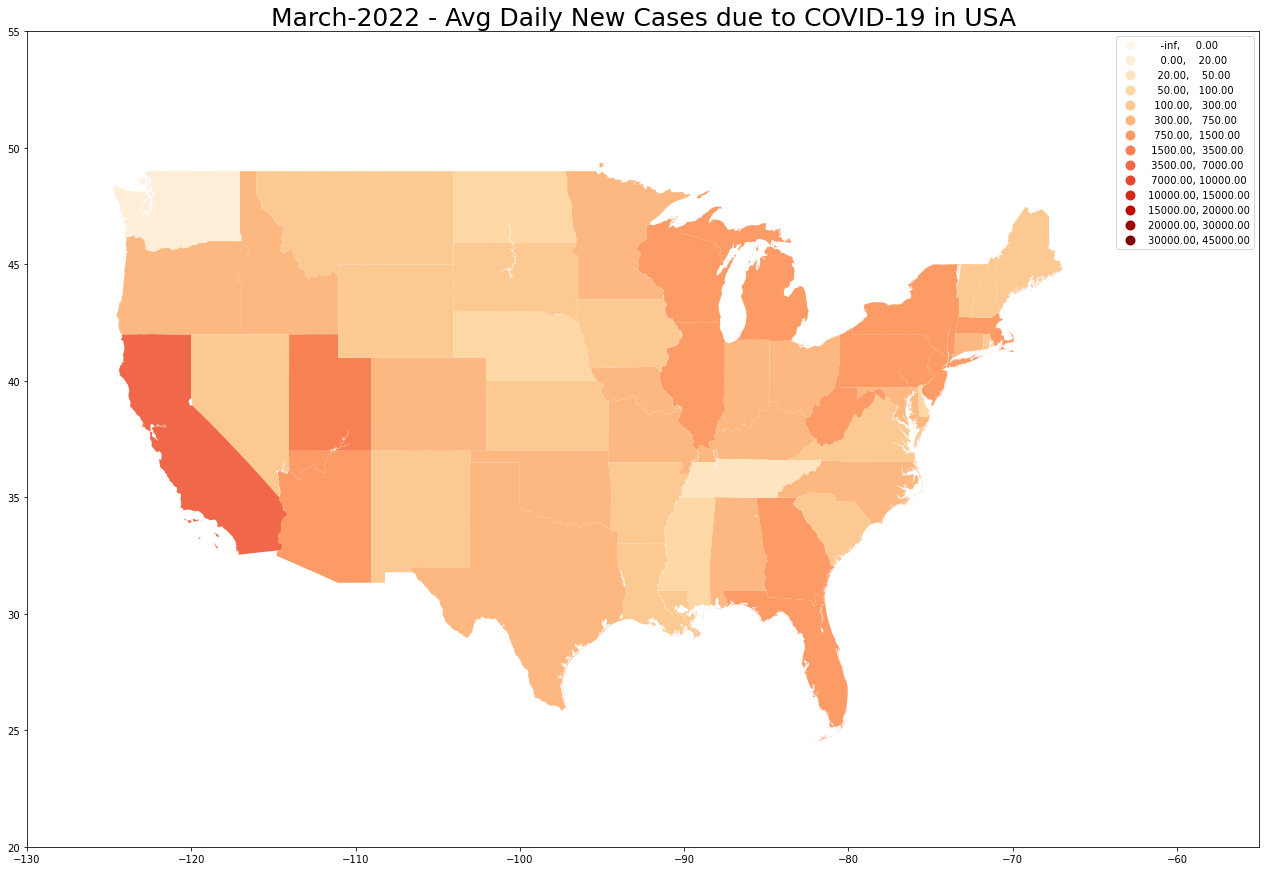

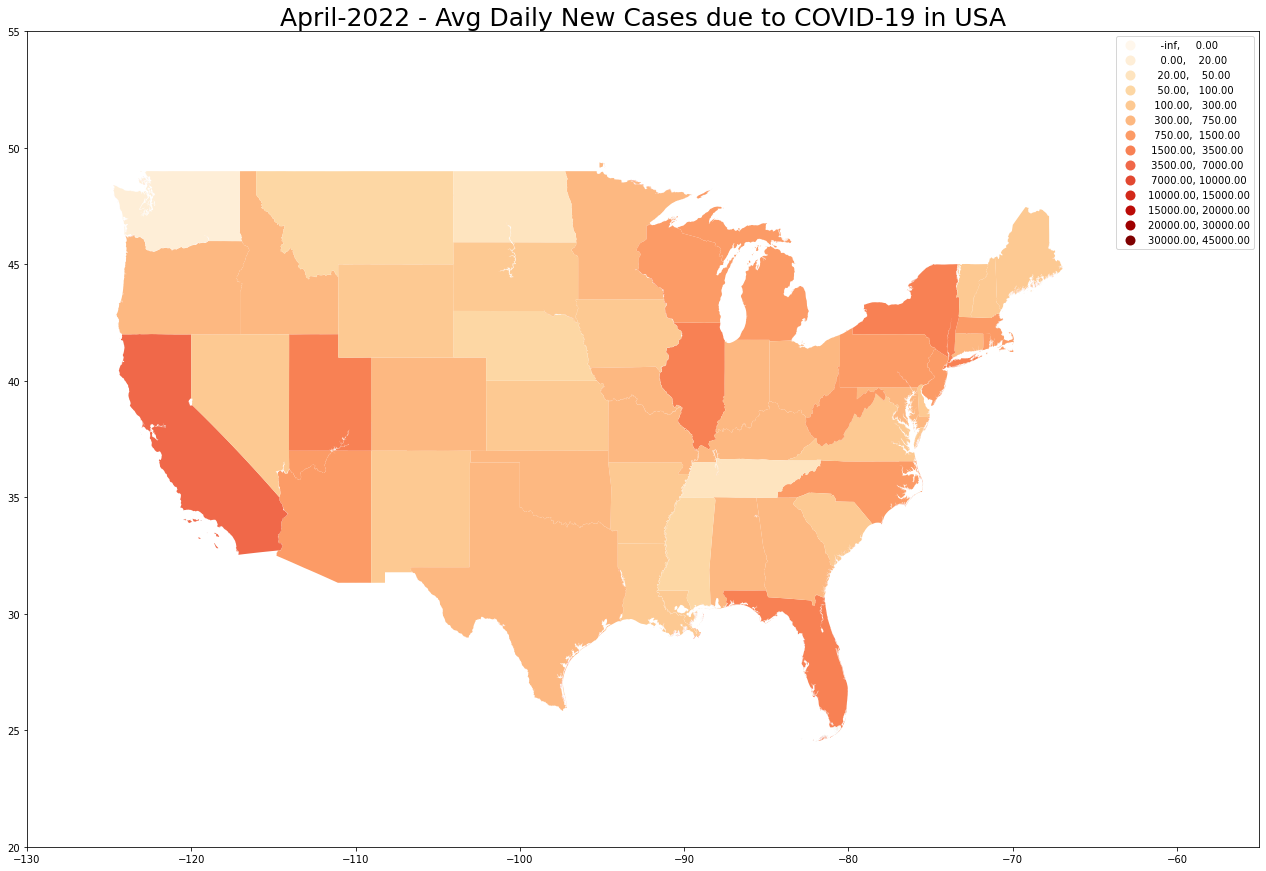

In [18]:
#Data Visualization
# Covid-19 average daily new cases in some of the selected months

dates=[['2020-03-01','2020-03-31', 'March-2020'], ['2020-07-01','2020-07-31', 'July-2020'], ['2020-10-01','2021-10-31', 'October-2020'], ['2020-12-01','2021-12-31', 'December-2020'], ['2021-01-01','2021-01-31', 'January-2021'], ['2021-04-01','2021-04-30', 'April-2021'], ['2021-07-01','2021-07-31', 'July-2021'], ['2021-09-01','2021-09-30', 'September-2021'], ['2022-01-01','2022-01-31', 'January-2022'], ['2022-03-01','2022-03-31', 'March-2022'], ['2022-03-01','2022-04-28', 'April-2022']]
for i in dates:
    mask = (us_cases['submission_date'] >= i[0]) & (us_cases['submission_date'] <= i[1])
    df=us_cases.loc[mask]
    df = df[['state', 'new_case']]
    df=df.groupby('state').mean()
    df.to_csv(r'/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/Cases/{}.csv'.format(i[2]), index=True)

mon= ['March-2020.csv', 'July-2020.csv', 'October-2020.csv', 'December-2020.csv','January-2021.csv', 'April-2021.csv', 'July-2021.csv', 'September-2021.csv', 'January-2022.csv', 'March-2022.csv', 'April-2022.csv']

#Importing the Shape file of the USA
geo_usa = geopandas.read_file('/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/STATE_MAP')

#Fitting the Data on the Map of the USA

for i in mon:
    df= pd.read_csv('/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/Cases/{}'.format(i))
    gdf = pd.concat([geo_usa, df], axis=1)
    gdf.plot(column='new_case', scheme='user_defined', classification_kwds={'bins':[0,20,50,100,300,750,1500,3500,7000,10000,15000,20000,30000,45000]}, figsize=(25, 15), legend=True, cmap='OrRd')
    plt.xlim(-130,-55)
    plt.ylim(20,55)
    plt.title('{} - Avg Daily New Cases due to COVID-19 in USA'.format(i[:-4]),fontsize=25)
    plt.show()



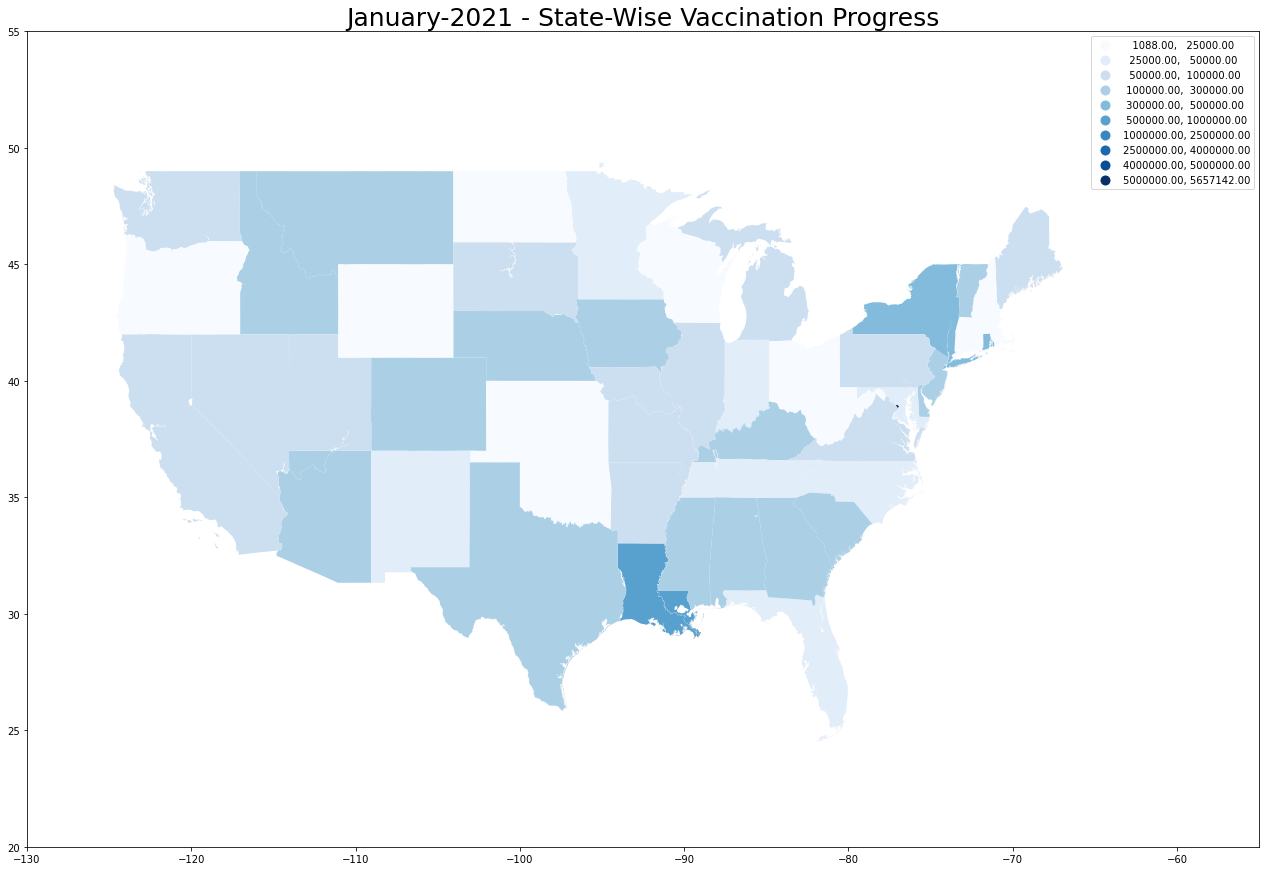

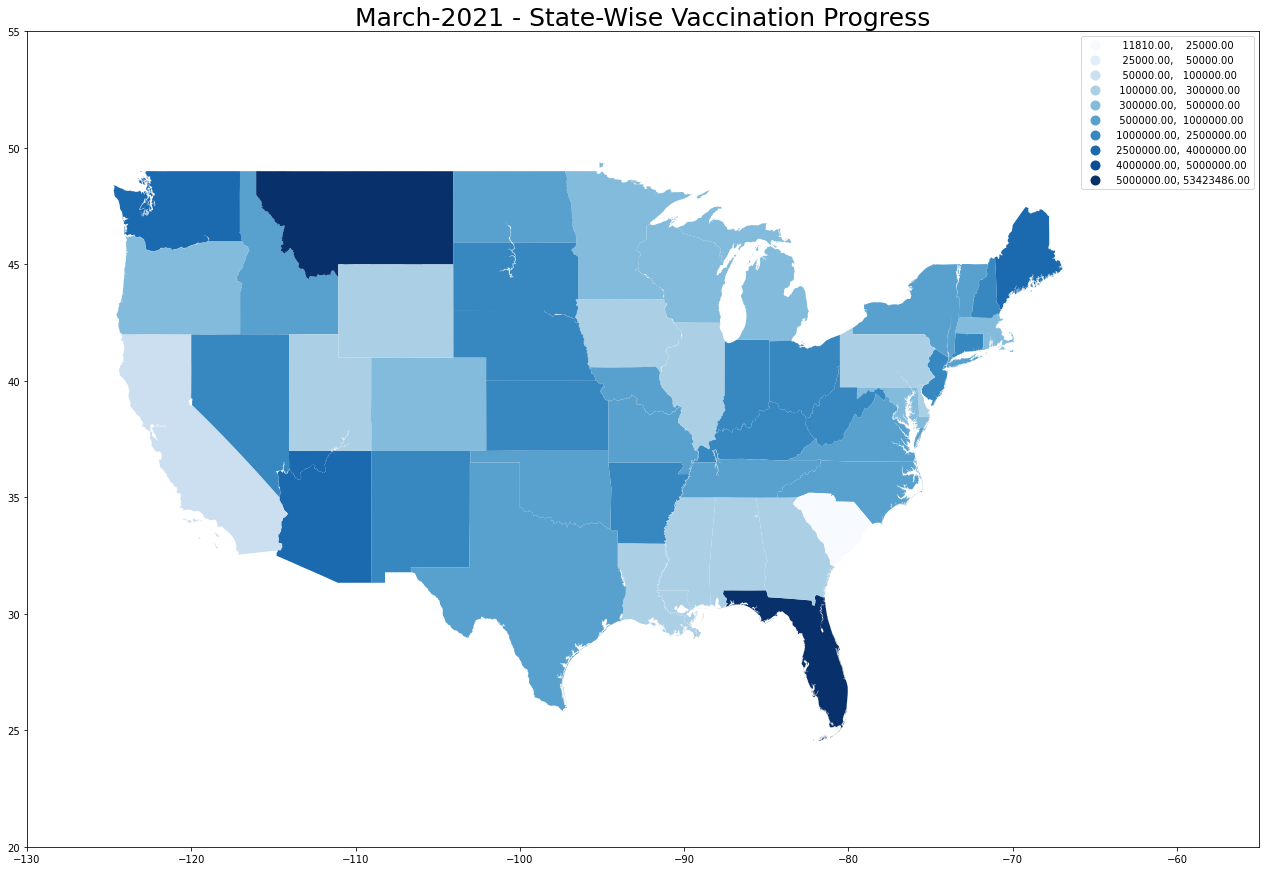

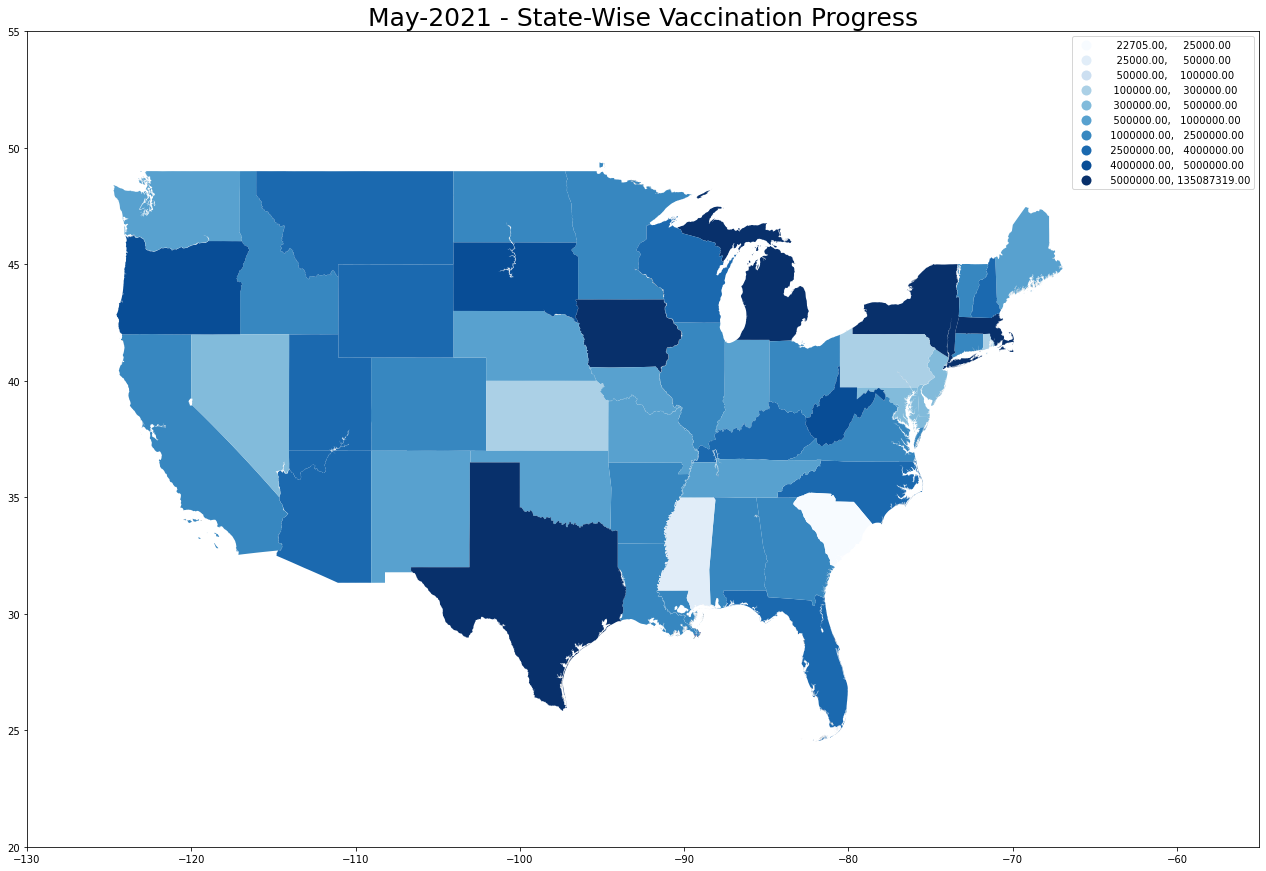

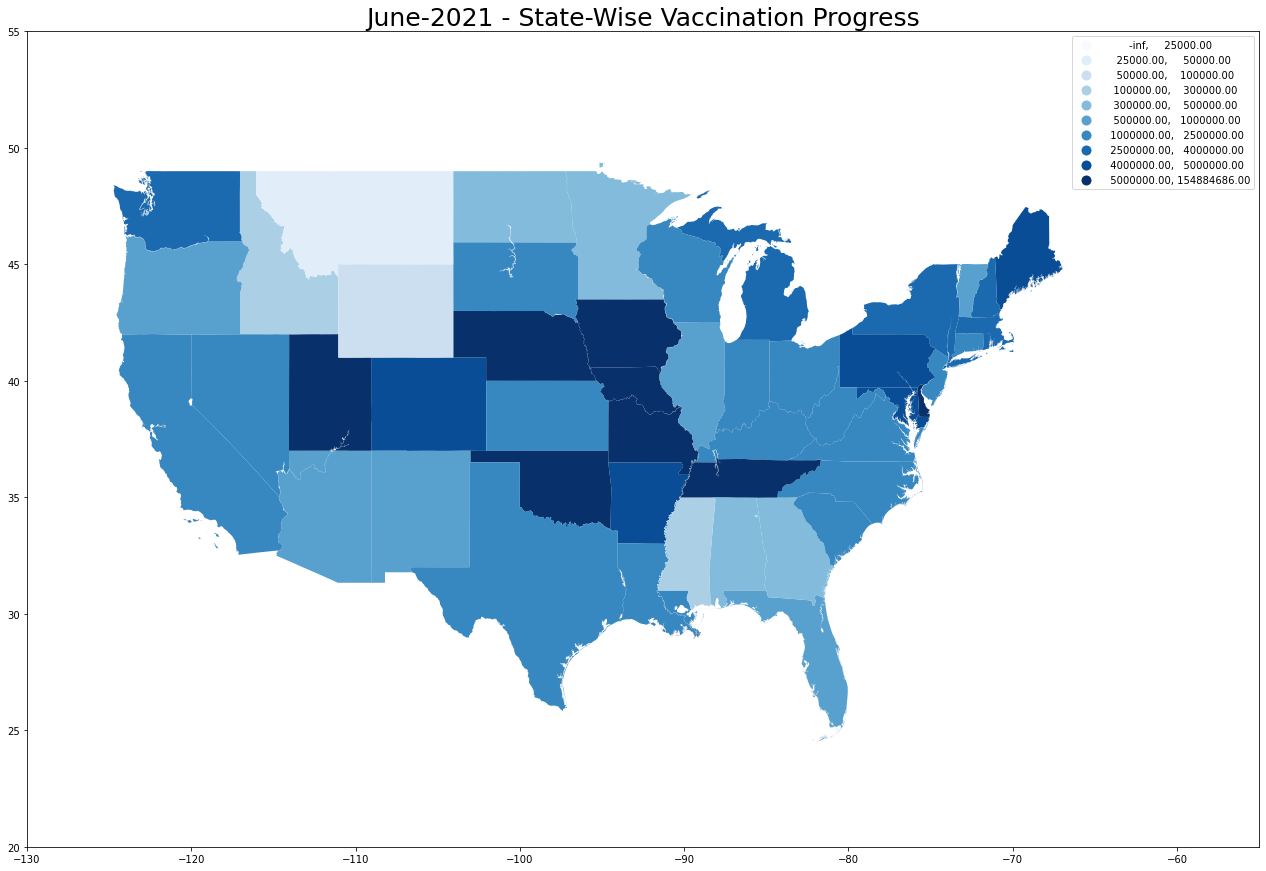

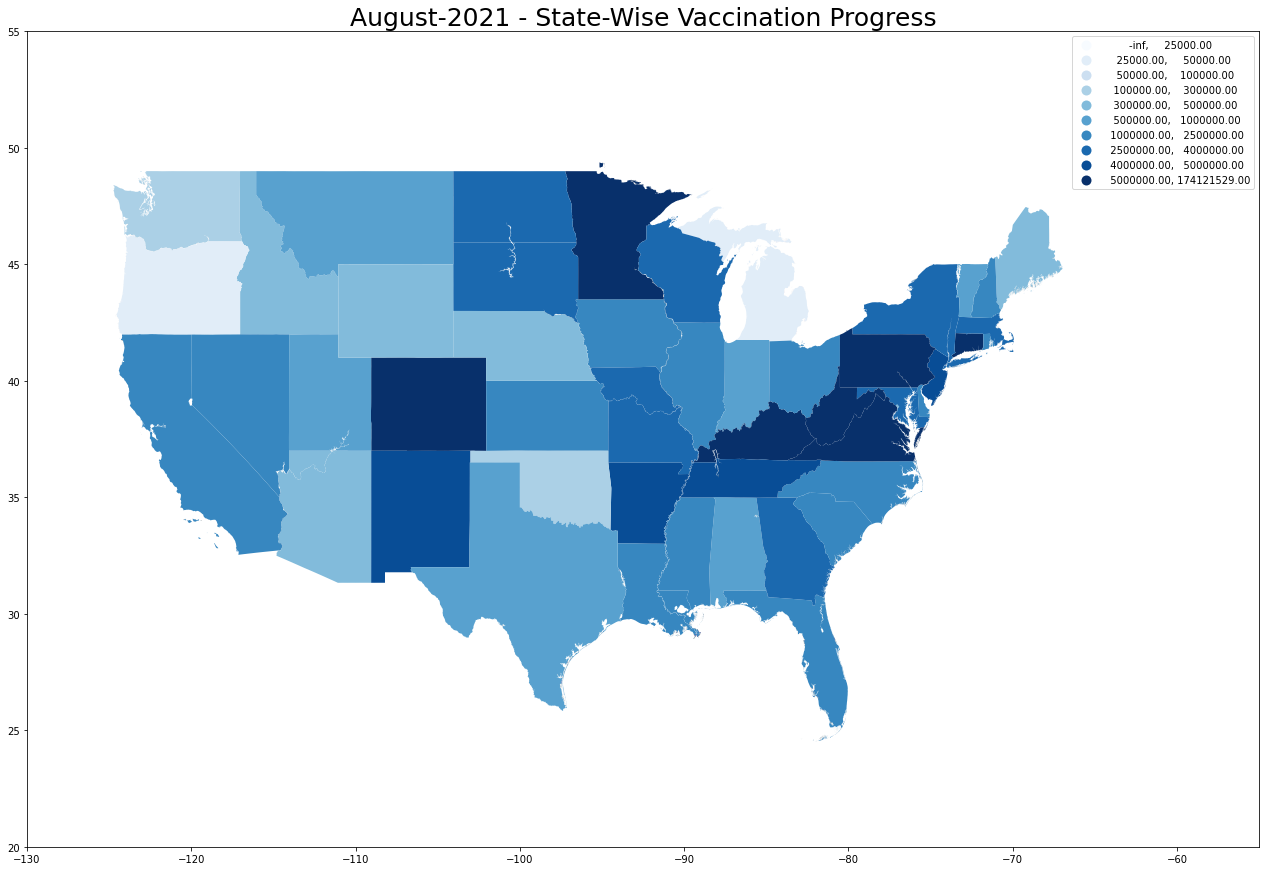

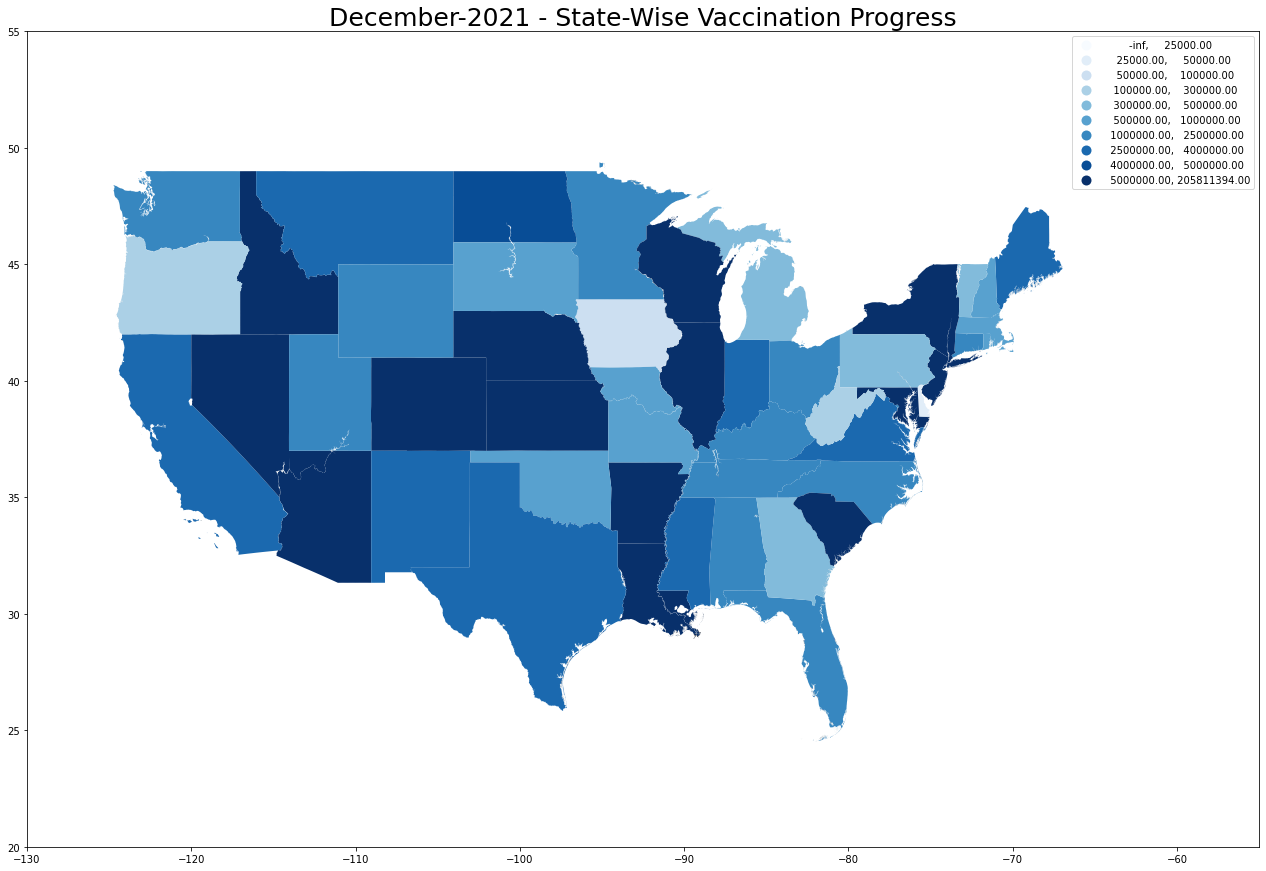

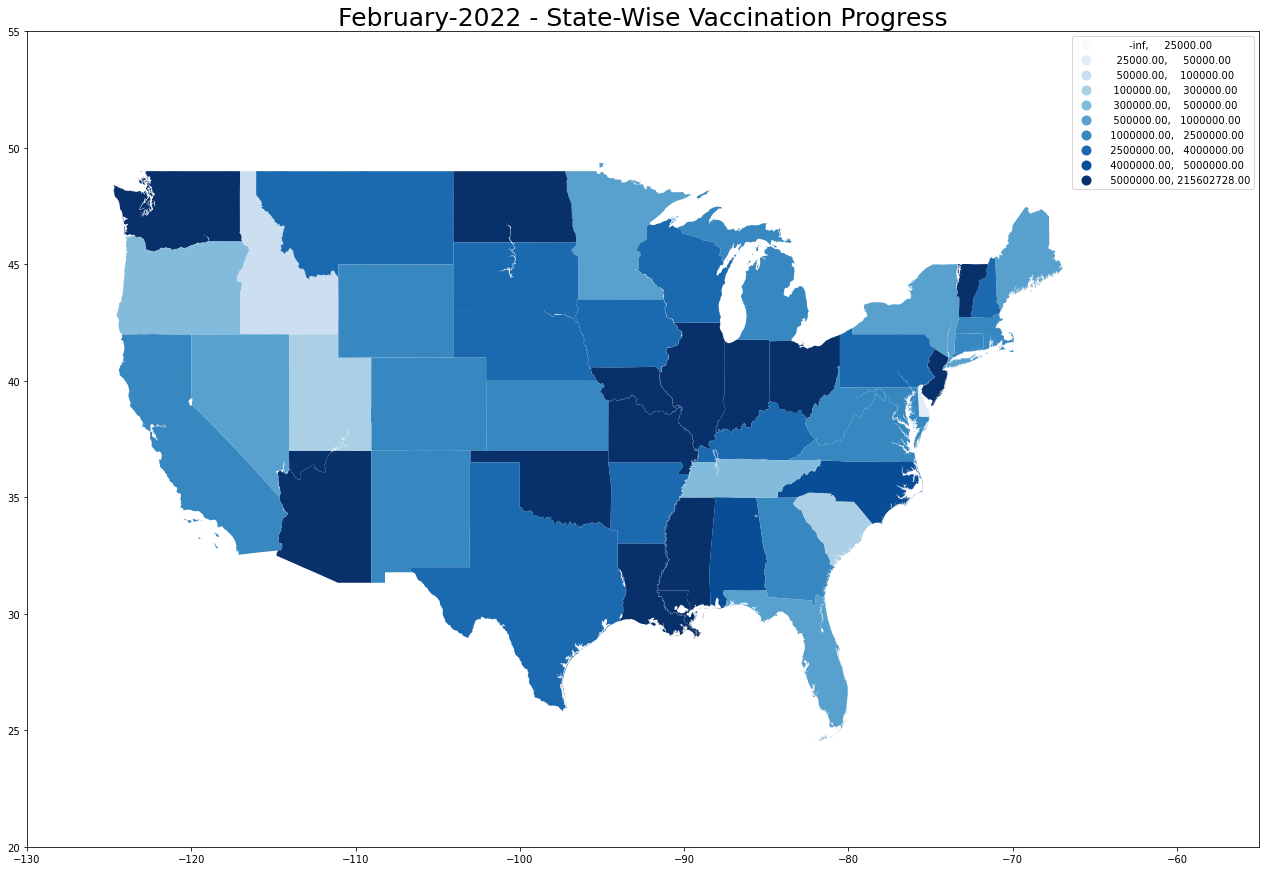

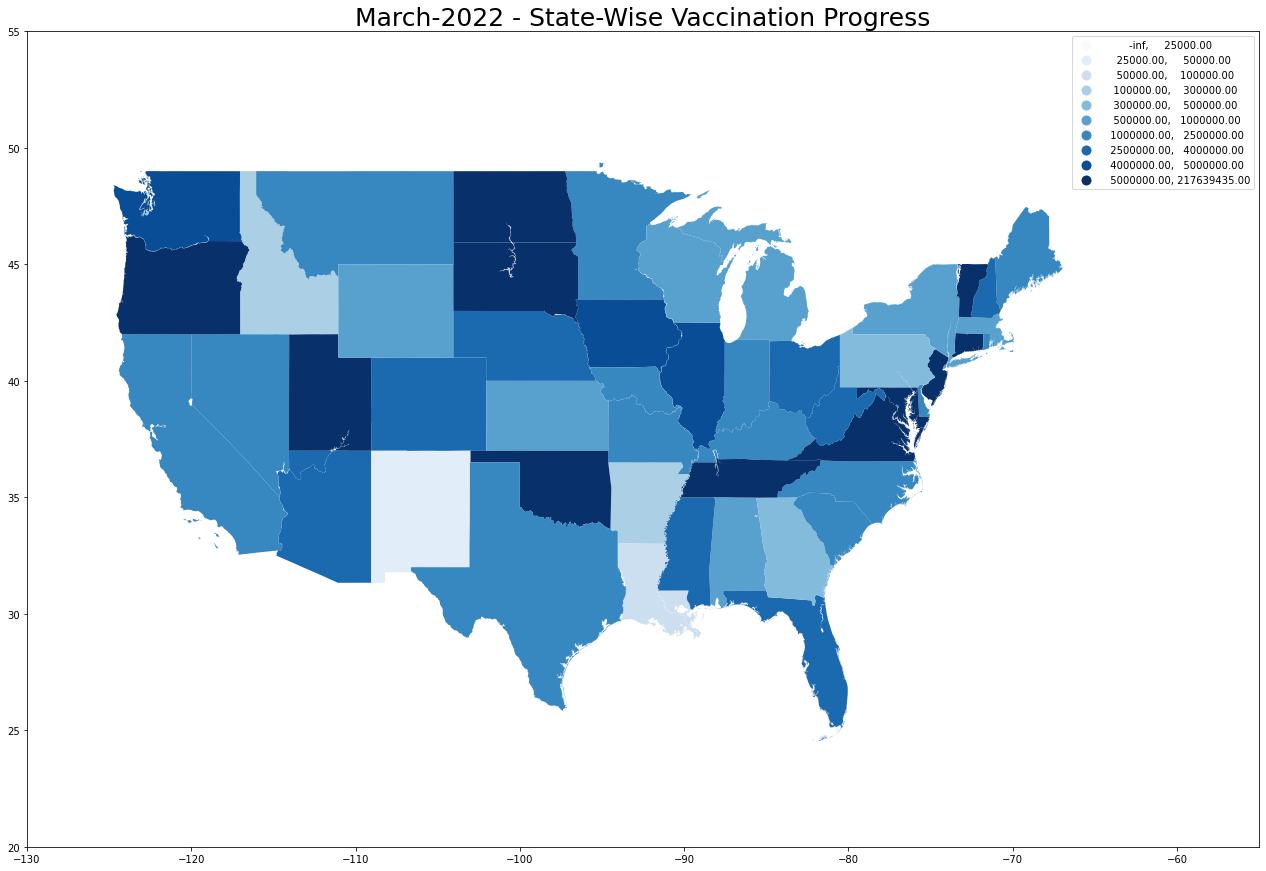

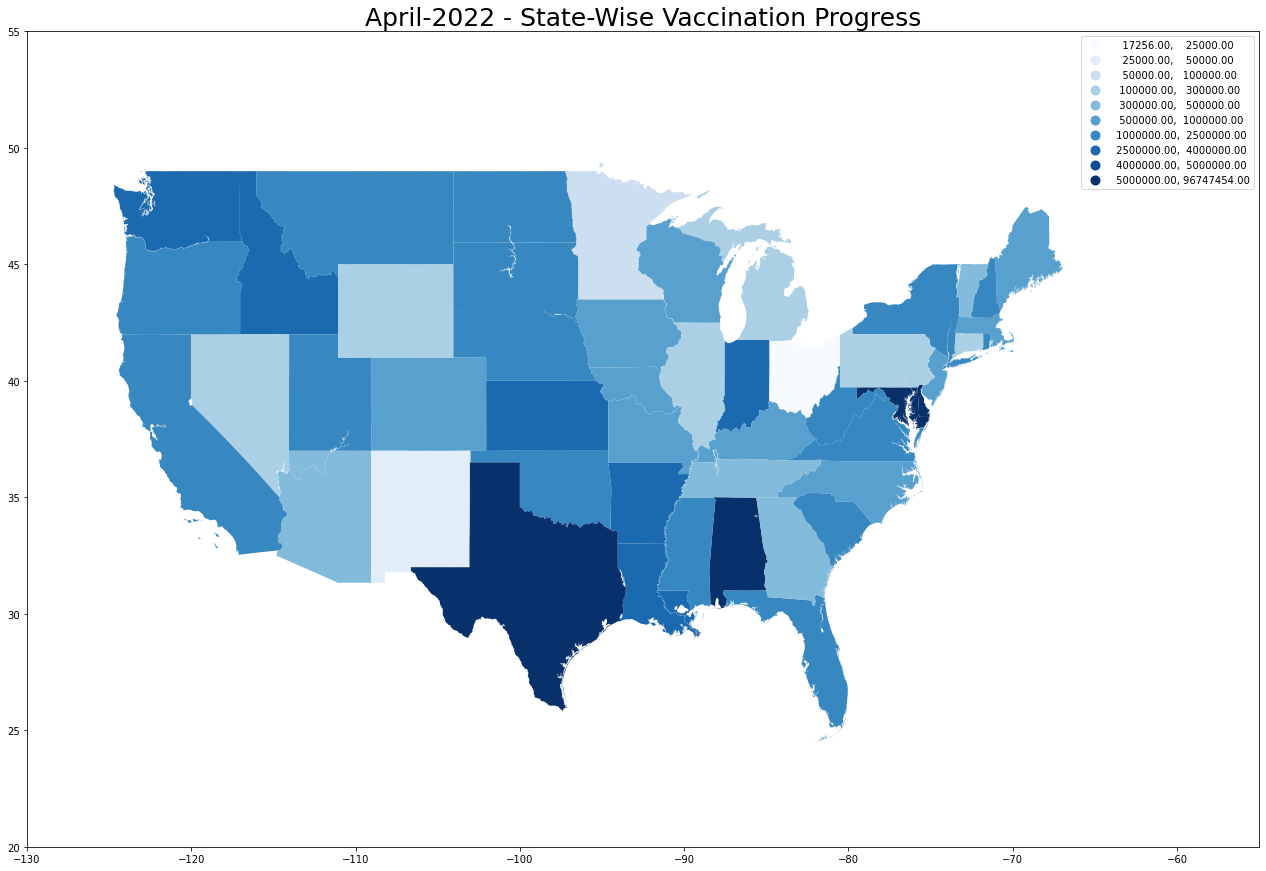

In [24]:
#Vaccination trend in some of the selected months

vdates=[['2021-01-31', 'January-2021'], ['2021-03-30', 'March-2021'], ['2021-06-30', 'June-2021'], ['2021-08-31', 'August-2021'], ['2021-12-30', 'December-2021'], ['2022-02-28', 'February-2022'], ['2022-03-31', 'March-2022'], ['2021-04-27', 'April-2022']]
for i in vdates:
    m = us_vac['date'] == i[0]
    vdf=us_vac.loc[m]
    vdf = vdf[['location', 'people_fully_vaccinated']]
    vdf.to_csv(r'/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/Vaccination/{}.csv'.format(i[1]), index=False)
    
#Importing the Shape file of the USA
geo_usa = geopandas.read_file('/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/STATE_MAP')

#Fitting the Data on the Map of the USA
for i in ['January-2021.csv','March-2021.csv','May-2021.csv','June-2021.csv','August-2021.csv','December-2021.csv','February-2022.csv','March-2022.csv','April-2022.csv']:
    df = pd.read_csv('/users/rajanpc/Desktop/MSIS/Spring-2022/DAVH/Project/Vaccination/{}'.format(i))
    gdf = pd.concat([geo_usa, df], axis=1)
    gdf.plot(column='people_fully_vaccinated', scheme='user_defined', classification_kwds={'bins':[25000, 50000, 100000, 300000, 500000, 1000000, 2500000, 4000000, 5000000]}, figsize=(25, 15), legend=True, cmap='Blues')
    plt.xlim(-130,-55)
    plt.ylim(20,55)
    plt.title('{} - State-Wise Vaccination Progress'.format(i[:-4]),fontsize=25)
    plt.show()


In [26]:
#Predictive Models to check the relationship between Avg New Cases and Vaccination trend:
# Applying Linear Regression

features = ['people_fully_vaccinated']
label = ['new_case']
X= fdf[features]
Y= fdf[label]

X_new = sm.add_constant(X)
regcorr = sm.OLS(Y, X_new)

stats = regcorr.fit()

print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:               new_case   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.90
Date:                Mon, 02 May 2022   Prob (F-statistic):           4.78e-05
Time:                        13:50:02   Log-Likelihood:                -5368.7
No. Observations:                 404   AIC:                         1.074e+04
Df Residuals:                     402   BIC:                         1.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

In [27]:
# Pearson correlation coefficient
r, p = scipy.stats.pearsonr(fdf['people_fully_vaccinated'], fdf['new_case'])
print(r,p)

0.20085284013359417 4.780774577476342e-05


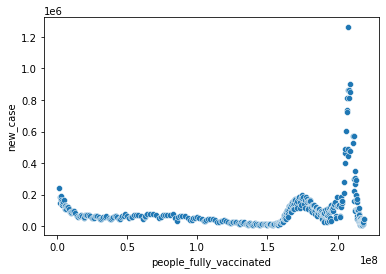

In [33]:
#Plotting the Scatter Plot
sns.scatterplot(fdf['people_fully_vaccinated'],fdf['new_case']);

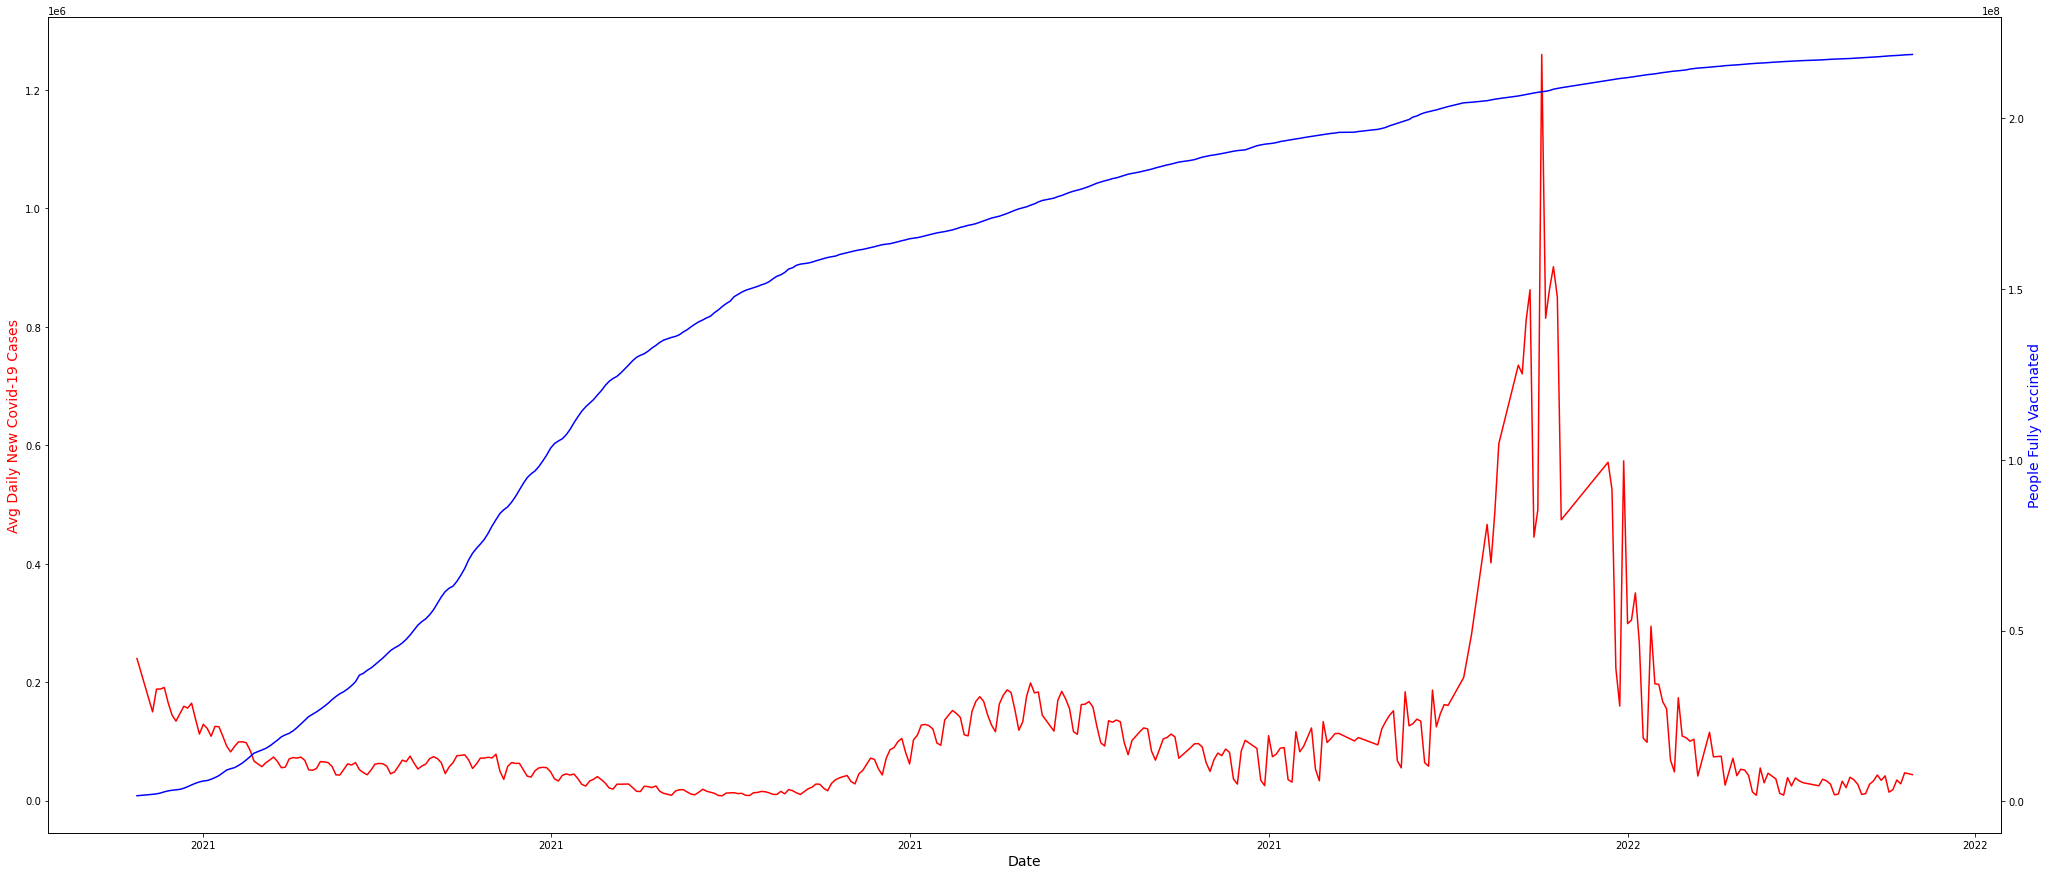

In [31]:
#Graphical Analysis:

# Line Plot of Newcases vs Vaccination

fig,ax = plt.subplots(figsize=(35, 15))
ax.plot(fdf['date'], fdf['new_case'], color="red")

ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Avg Daily New Covid-19 Cases",color="red",fontsize=14)

ax2=ax.twinx()
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.plot(fdf['date'], fdf['people_fully_vaccinated'],color="blue")
ax2.set_ylabel("People Fully Vaccinated",color="blue",fontsize=14)

plt.show()